### Clahe 전처리 및 이미지 파일 재저장

In [ ]:
! pip install SimpleITK

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pydicom as pdc
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
import SimpleITK as sitk
import glob
import shutil
from skimage import exposure

In [60]:
path = "./benchmark_liver_tumor/raw/*"

(512, 512)
(1, 512, 512, 1)


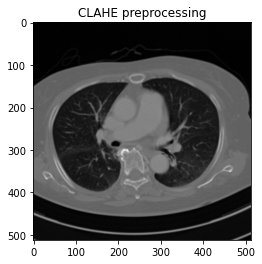

In [63]:
def make_image(data):
        try:
            if len(data.shape) == 2:
                # grayscale image, just add once channel
                data = data.reshape((data.shape[0], data.shape[1], 1))

            image = array_to_img(data)
        except Exception:
            return None

        # image = image.resize((128, 128))

        return image 

file_path = 'benchmark_liver_tumor/raw/SN00017916/SN00017916_0001.dcm'
#file_path = 'benchmark_liver_tumor/raw/SN00037077/SN00037077_0001.dcm'
sample = pdc.dcmread(file_path)
sample_np = sample.pixel_array
print(sample_np.shape)
img = make_image(sample_np)
#img=img.resize((125,125))
x = img_to_array(img)
plt.figure()
plt.title('original')
plt.imshow(img,cmap='gray')


x = x.reshape((1,) + x.shape)  
print(x.shape)
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32))
sample_np_exp=exposure.equalize_adapthist(sample_np,clip_limit=0.03,nbins=512)
#sameple_clahe = clahe.apply(sample_np_exp)
plt.title('CLAHE preprocessing')
plt.imshow(sample_np_exp,cmap='gray')

plt.show()

## Generate Images from directory

In [67]:
# seperate direcctory
folder_list = glob.glob(path)
img_folders=[]
for folder in folder_list:
    if not folder.endswith(".xlsx"):
        if "SN"in folder:
            img_folders.append(folder)
            
train_cnt= round(len(img_folders)*0.7)
train_folder_list = img_folders[:train_cnt+1]
test_folder_list = img_folders[train_cnt+1:]


train_img_list = []
for folder in train_folder_list:
    path = f"{folder}/*"
    [train_img_list.append(img) for img in glob.glob(path) if img.endswith(".dcm")]
    
test_img_list = []
for folder in test_folder_list:
    path = f"{folder}/*"
    [test_img_list.append(img) for img in glob.glob(path) if img.endswith(".dcm")]

In [68]:
# copy forlder
import os

path = "./benchmark_liver_tumor/raw"
folder_name = os.listdir(path)
folder_n = []
for folder in folder_name:
    if not folder.endswith(".xlsx"):
        if "SN"in folder:
            folder_n.append(folder)

for folder in folder_n[:train_cnt+1]:
    shutil.copytree(f"./benchmark_liver_tumor/raw/{folder}",f"./benchmark_liver_tumor/train/{folder}" )

for folder in folder_n[train_cnt+1:]:
    shutil.copytree(f"./benchmark_liver_tumor/raw/{folder}",f"./benchmark_liver_tumor/test/{folder}" )


FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: './benchmark_liver_tumor/train/SN00017916'

In [73]:
from PIL import Image  
import os 
def preprocessing(file_path,save_to_dir,save_name):
    sample = pdc.dcmread(file_path)
    sample_np = sample.pixel_array
    #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32))
    #sameple_clahe = clahe.apply(sample_np)
    
    sample_np_exp=exposure.equalize_adapthist(sample_np,clip_limit=0.03,nbins=512)
    #sameple_clahe = clahe.apply(sample_np_exp)
    
    
    img = make_image(sample_np_exp)

    try: 
        os.mkdir(save_to_dir) 
    except:
        pass
    img = img.save(save_to_dir+save_name) 


In [81]:
# train 폴더의 이미지만 CLAHE
import os
import shutil

path = "./benchmark_liver_tumor/train"
folder_name = os.listdir(path)
for folder in folder_name:
    print(folder)
    if not folder.endswith(".xlsx"):
        if "SN"in folder:
            img_list=[img for img in glob.glob(f"{path}/{folder}/*") if img.endswith(".dcm")] # 폴더 내 이미지 리스트
            print(img_list)
            idx = 1
            # mg = []
            for img in img_list:
                preprocessing(img,save_to_dir=f"{path}/train/{folder}/",save_name=f"{folder}_{idx}.png")
                print(idx)
                idx +=1        

SN00017916
['./benchmark_liver_tumor/train/SN00017916\\SN00017916_0001.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0002.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0003.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0004.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0005.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0006.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0007.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0008.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0009.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0010.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0011.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0012.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0013.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0014.dcm', './benchmark_liver_tumor/train/SN00017916\\SN00017916_0015.dcm', './benchmark_

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
SN00037077
['./benchmark_liver_tumor/train/SN00037077\\SN00037077_0001.dcm', './benchmark_liver_tumor/train/SN00037077\\SN00037077_0002.dcm', './benchmark_liver_tumor/train/SN00037077\\SN00037077_0003.dcm', './benchmark_liver_tumor/train/SN00037077\\SN00037077_0004.dcm', './benchmark_liver_tumor/train/SN00037077\\SN00037077_0005.dcm', './benchmark_liver_tumor/train/SN00037077\\SN00037077_0006.dcm', './benchmark_l

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
SN00053598
['./benchmark_liver_tumor/train/SN00053598\\SN00053598_0001.dcm', './benchmark_liver_tumor/train/SN00053598\\SN00053598_0002.dcm', './benchmark_liver_tumor/train/SN00053598\\SN00053598_0003.dcm', './benchmark_liver_tumor/train/SN00053598\\SN00053598_0004.dcm', './benchmark_liver_tumor/train/SN00053598\\SN00053598_0005.dcm', './benchmark_liver_tumor/train/SN00053598\\SN00053598_0006.dcm', './benchmark_liver_t

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
SN00058009
['./benchmark_liver_tumor/train/SN00058009\\SN00058009_0001.dcm', './benchmark_liver_tumor/train/SN00058009\\SN00058009_0002.dcm', './benchmark_liver_tumor/train/SN00058009\\SN00058009_0003.dcm', './benchmark_liver_tumor/train/SN00058009\\SN00058009_0004.dcm', './benchmark_liver_tumor/train/SN00058009\\SN00058009_0005.dcm', './benchmark_liver_tumor/train/SN00058009\\SN00058009_0006.dcm', './benchmark_liver_tumor/train/SN00058009\\SN00058009_0007.dcm', './benchmark_liver_tu

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
SN00067936
['./benchmark_liver_tumor/train/SN00067936\\SN00067936_0001.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0002.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0003.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0004.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0005.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0006.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0007.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0008.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0009.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0010.dcm', './benchmark_liver_tumor/train/SN00067936\\SN00067936_0011.dcm', '.

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
SN00076806
['./benchmark_liver_tumor/train/SN00076806\\SN00076806_0001.dcm', './benchmark_liver_tumor/train/SN00076806\\SN00076806_0002.dcm', './benchmark_liver_tumor/train/SN00076806\\SN00076806_0003.dcm', './benchmark_liver_tumor/train/SN00076806\\SN00076806_0004.dcm', './benchmark_liver_tumor/train/SN00076806\\SN00076806_0005.dcm', './benchmar

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
SN00090078
['./benchmark_liver_tumor/train/SN00090078\\SN00090078_0001.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0002.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0003.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0004.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0005.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0006.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0007.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0008.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0009.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0010.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0011.dcm', './benchmark_liver_tumor/train/SN00090078\\SN00090078_0012.dcm', './benchmark_liver_tumor/train/SN0009

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
SN00094752
['./benchmark_liver_tumor/train/SN00094752\\SN00094752_0001.dcm', './benchmark_liver_tumor/train/SN00094752\\SN00094752_0002.dcm', './benchmark_liver_tumor/train/SN00094752\\SN00094752_0003.dcm', './benchmark_liver_tumor/train/SN00094752\\SN00094752_0004.dcm', './benchmark_liver_tumor/train/SN00094752\\SN00094752_0005.dcm', './benchmark_liver_tumor/train/SN00094752\\SN00094752_0006.dcm', './benchmark_liver_tumor/train/SN00094752\\SN00094752_0007.dcm', './benchmark_liver_

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
SN00097002
['./benchmark_liver_tumor/train/SN00097002\\SN00097002_0001.dcm', './benchmark_liver_tumor/train/SN00097002\\SN00097002_0002.dcm', './benchmark_liver_tumor/train/SN00097002\\SN00097002_0003.dcm', './benchmark_liver_tumor/train/SN00097002\\SN00097002_0004.dcm', './benchmark_liver_tumor/train/SN00097002\\SN00097002_0005.dcm', './benchmark_liver_tumor/train/SN00097002\\SN00097002_0006.dcm', './benchmark_liver_tumor/train/SN00097002\\SN00097002_0007.dcm

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
SN00108220
['./benchmark_liver_tumor/train/SN00108220\\SN00108220_0001.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0002.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0003.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0004.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0005.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0006.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0007.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0008.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0009.dcm', './benchmark_liver_tumor/train/SN00108220\\SN00108220_0010.dcm', './benchmark_liver_tumor/train/S

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
SN00116934
['./benchmark_liver_tumor/train/SN00116934\\SN00116934_0001.dcm', './benchmark_liver_tumor/train/SN00116934\\SN00116934_0002.dcm', './benchmark_liver_tumor/train/SN00116934\\SN00116934_0003.dcm', './benchmark_liver_tumor/train/SN00116934\\SN00116934_0004.dcm', './benchmark_liver_tumor/train/SN00116934\\SN00116934_0005.dcm', './benchmark_liver_tumor/train/SN00116934\\SN00116934_0006.dcm', './benchmark_liver_tumor/train/SN00116934\\SN00116934_0007.dcm', './benchmark_liver_tumor/train/SN00116934\\SN00116934_0008.dcm', './b

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
SN00125104
['./benchmark_liver_tumor/train/SN00125104\\SN00125104_0001.dcm', './benchmark_liver_tumor/train/SN00125104\\SN00125104_0002.dcm', './benchmark_liver_tumor/train/SN00125104\\SN00125104_0003.dcm', './benchmark_li

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
SN00133173
['./benchmark_liver_tumor/train/SN00133173\\SN00133173_0001.dcm', './benchmark_liver_tumor/train/SN00133173\\SN00133173_0002.dcm', './benchmark_liver_tumor/train/SN00133173\\SN00133173_0003.dcm', './benchmark_liver_tumor/train/SN00133173\\SN00133173_0004.dcm', './benchmark_liver_tumor/train/SN00133173\\SN00133173_0005.dcm', './benchmark_liver_tu

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
SN00141501
['./benchmark_liver_tumor/train/SN00141501\\SN00141501_0001.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0002.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0003.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0004.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0005.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0006.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0007.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0008.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0009.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0010.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0011.dcm', './benchmark_liver_tumor/train/SN00141501\\SN00141501_0012.dcm', './benchmark_liver_tumor/train/SN00141501\\SN0

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
SN00149847
['./benchmark_liver_tumor/train/SN00149847\\SN00149847_0001.dcm', './benchmark_liver_tumor/train/SN00149847\\SN00149847_0002.dcm', './benchmark_liver_tumor/train/SN00149847\\SN00149847_0003.dcm', './benchmark_liver_tumor/train/SN00149847\\SN00149847_0004.dcm', './benchmark_liver_tumor/train/SN00149847\\SN00149847_0005.dcm', './benchmark_liver_tumor/train/SN00149847\\SN00149847_0006.dcm', './benchmark_liver_tumor/train/SN00149847\\SN00149847_0007.dcm', './benchmark_liver_tumor/train/SN00149847\\SN0014

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
SN00156063
['./benchmark_liver_tumor/train/SN00156063\\SN00156063_0001.dcm', './benchmark_liver_tumor/train/SN00156063\\SN00156063_0002.dcm', './benchmark_liver_tumor/train/SN00156063\\SN00156063_0003.dcm', './benchmark_liver_tumor/train/SN00156063\\SN00156063_0004.dcm', './benchmark_liver_tumor/train/SN00156063\\SN00156063_0005.dcm', './benchmark_liver_tumor/train/SN00156063\\SN00156063_0006.

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
SN00160909
['./benchmark_liver_tumor/train/SN00160909\\SN00160909_0001.dcm', './benchmark_liver_tumor/train/SN00160909\\SN00160909_0002.dcm', './benchmark_liver_tumor/train/SN00160909\\SN00160909_0003.dcm', './benchmark_liver_tumor/train/SN00160909\\SN00160909_0004.dcm', './benchmark_liver_tumor/train/SN00160909\\SN00160909_0005.dcm', './benchmark_liver_tumor/train/SN00160909\\SN00160909_0006.dcm', './benchmark_l

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
SN00164376
['./benchmark_liver_tumor/train/SN00164376\\SN00164376_0001.dcm', './benchmark_liver_tumor/train/SN00164376\\SN00164376_0002.dcm', './benchmark_liver_tumor/train/SN00164376\\SN00164376_0003.dcm', './benchmark_liver_tumor/train/SN00164376\\SN00164376_0004.dcm', './benchmark_liver_tumor/train/SN00164376\\SN00164376_0005.dcm', './benchmark_liver_tumor/train/SN00164376\\SN00164376_0006.dcm', './benchmark_liver_tumor/train/SN00164376\\SN00164376_0007.dcm', './be

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
SN00167667
['./benchmark_liver_tumor/train/SN00167667\\SN00167667_0001.dcm', './benchmark_liver_tumor/train/SN00167667\\SN00167667_0002.dcm', './benchmark_liver_tumor/train/SN00167667\\SN00167667_0003.dcm', './benchmark_liver_tumor/train/SN00167667\\SN00167667_0004.dcm', './benchmark_liver_tumor/train/SN00167667\\SN00167667_0005.dcm', './benchmark_liver_tumor/train/SN00167667\\SN00167667_0006.dcm', './benchmark_liver_tumor/train/SN00167667\

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
SN00168744
['./benchmark_liver_tumor/train/SN00168744\\SN00168744_0001.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0002.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0003.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0004.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0005.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0006.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0007.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0008.dcm', './benchmark_liver_tumor/train/SN00168744\\SN00168744_0009.d

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
SN00177221
['./benchmark_liver_tumor/train/SN00177221\\SN00177221_0001

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
SN00180816
['./benchmark_liver_tumor/train/SN00180816\\SN00180816_0001.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0002.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0003.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0004.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0005.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0006.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0007.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0008.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0009.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0010.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0011.dcm', './benchmark_liver_tumor/train/SN00180816\\SN00180816_0012.dcm', './benchmark_liver_tumor/train/SN00180816\\SN

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
SN00181638
['./benchmark_liver_tumor/train/SN00181638\\SN00181638_0001.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0002.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0003.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0004.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0005.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0006.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0007.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0008.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0009.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0010.dcm', './benchmark_liver_tumor/train/SN00181638\\SN00181638_0011.dcm', './benchmark_

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
SN00182152
['./benchmark_liver_tumor/train/SN00182152\\SN00182152_0001.dcm', './benchmark_liver_tumor/train/SN00182152\\SN00182152_0002.dcm', './benchmark_liver_tumor/train/SN00182152\\SN00182152_0003.dcm', './benchmark_liver_tumor/train/SN00182152\\SN00182152_0004.dcm', './benchmark_liver_tumor/train/SN00182152\\SN00182152_0005.dcm', './benchmark_liver_tumor/train/SN00182152\\SN00182152_0006.dcm', './benchma

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
SN00188420
['./benchmark_liver_tumor/train/SN00188420\\SN00188420_0001.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0002.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0003.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0004.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0005.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0006.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0007.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0008.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0009.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0010.dcm', './benchmark_liver_tumor/train/SN00188420\\SN00188420_0011.dcm', './benchmark_liver_tumor/train/SN00188420\\SN0

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
SN00194860
['./benchmark_liver_tumor/train/SN00194860\\SN00194860_0001.dcm', './benchmark_liver_tumor/train/SN00194860\\SN00194860_0002.dcm', './benchmark_liver_tumor/train/SN00194860\\SN00194860_0003.dcm', './benchmark_liver_tumor/train/SN00194860\\SN00194860_0004.dcm', './benchmark_liver_tumor/train/SN00194860\\SN00194860_0005.dcm', './benchmark_liver_tumor/train/SN00194860\\SN00194860_0006.dcm', './benchmark_liver_tumor/train/SN00194860\\SN00194860_0007

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
SN00203040
['./benchmark_liver_tumor/train/SN00203040\\SN00203040_0001.dcm', './benchmark_liver_tumor/train/SN00203040\\SN00203040_0002.dcm', './benchmark_liver_tumor/train/SN00203040\\SN00203040_0003.dcm', './benchmark_liver_tumor/train/SN00203040\\SN00203040_0004.dcm', './benchmark_liver_tumor/train/SN00203040\\SN00203040_0005.dcm', './benchmark_liver_

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
SN00206804
['./benchmark_liver_tumor/train/SN00206804\\SN00206804_0001.dcm', './benchmark_liver_tumor/train/SN00206804\\SN00206804_0002.dcm', './benchmark_liver_tumor/train/SN00206804\\SN00206804_0003.dcm', './benchmark_liver_tumor/train/SN00206804\\SN00206804_0004.dcm', './benchmark_liver_tumor/train/SN00206804\\SN00206804_0005.dcm', './benchmark_liver_tumor/train/SN00206804\\SN00206804_0006.dcm', './benchmark_liver_tumor/train/SN002

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
SN00221985
['./benchmark_liver_tumor/train/SN00221985\\SN00221985_0001.dcm', './benchmark_liver_tumor/train/SN00221985\\SN00221985_0002.dcm', './benchmark_liver_tumor/train/SN00221985\\SN00221985_0003.dcm', './benchmark_liver_tumor/train/SN00221985\\SN00221985_0004.dcm', './benchmark_liver_tumor/train/SN00221985\\SN00221985_0005.dcm', './benchmark_liver_tumor/train/SN00221985\\SN00221985_0006.dcm', './benchmark_liver_tumor/train/SN00221985\\SN00221985_0007.dcm', './benchmark_liver_tumor/train/SN00221985\\

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
SN00224323
['./benchmark_liver_tumor/train/SN00224323\\SN00224323_0001.dcm', './benchmark_liver_tumor/train/SN00224323\\SN00224323_0002.dcm', './benchmark_liver_tumor/train/SN00224323\\SN00224323_0003.dcm', './benchmark_liver_tumor/train/SN00224323\\SN00224323_0004.dcm', './benchmark_liver_tumor/train/SN00224323\\SN00224323_0005.dcm', './benchmark_liver_tumor/train/SN00224323\\SN00224323_0006.dcm', './benchmark_liver_tumor/train/SN00224323\\SN00224323_0007.dcm',

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
SN00224464
['./benchmark_liver_tumor/train/SN00224464\\SN00224464_0001.dcm', './benchmark_liver_tumor/train/SN00224464\\SN00224464_0002.dcm', './benchmark_liver_tumor/train/SN00224464\\SN00224464_0003.dcm', './benchmark_liver_tumor/train/SN00224464\\SN00224464_0004.dcm', './benchmark_liver_tumor/train/SN00224464\\SN00224464_0005.dcm', './benchmark_liver_tumor/train/SN00224464\\SN00224464_0006.dcm', './benchmark_liver_tumor/train/SN00224464\\SN00224464_0007.dcm',

6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
SN00226166
['./benchmark_liver_tumor/train/SN00226166\\SN00226166_0001.dcm', './benchmark_liver_tumor/train/SN00226166\\SN00226166_0002.dcm', './benchmark_liver_tumor/train/SN00226166\\SN00226166_0003.dcm', './benchmark_liver_tumor/train/SN00226166\\SN00226166_0004.dcm', './benchmark_liver_tum

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
SN00231441
['./benchmark_liver_tumor/train/SN00231441\\SN00231441_0001.dcm', './benchmark_liver_tumor/train/SN00231441\\SN00231441_0002.dcm', './benchmark_liver_tumor/train/SN00231441\\SN00231441_0003.dcm', './benchmark_liver_tumor/train/SN00231441\\SN00231441_0004.dcm', './benchmark_liver_tumor/train/SN00231441\\SN00231441_0005.dcm', './benchmark_liver_tumor/train/SN00231441\\SN00231441_0006.dcm', './benchmark_liver_tumor/train/SN00231441\\SN00231441_0007.dcm', './benchmark_

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
SN00235329
['./benchmark_liver_tumor/train/SN00235329\\SN00235329_0001.dcm', './benchmark_liver_tumor/train/SN00235329\\SN00235329_0002.dcm', './benchmark_liver_tumor/train/SN00235329\\SN00235329_0003.dcm', './benchm

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
SN00238383
['./benchmark_liver_tumor/train/SN00238383\\SN00238383_0001.dcm', './benchmark_liver_tumor/train/SN00238383\\SN00238383_0002.dcm', './benchmark_liver_tumor/train/SN00238383\\SN00238383_0003.dcm', './benchmark_liver_tumor/train/SN00238383\\SN00238383_0004.dcm', './benchmark_liver_tumor/train/SN00238383\\SN00238383_0005.dcm', './benchmark_liver_tumor/train/SN00238383\\SN

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
SN00257665
['./benchmark_liver_tumor/train/SN00257665\\SN00257665_0001.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0002.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0003.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0004.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0005.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0006.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0007.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0008.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0009.dcm', './benchmark_liver_tumor/train/SN00257665\\SN00257665_0

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
SN00274538
['./benchmark_liver_tumor/train/SN00274538\\SN00274538_0001.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0002.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0003.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0004.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0005.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0006.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0007.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0008.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0009.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0010.dcm', './benchmark_liver_tumor/train/SN00274538\\SN00274538_0011.dc

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
SN00283964
['./benchmark_liver_tumor/train/SN00283964\\SN00283964_0001.dcm', './benchmark_liver_tumor/train/SN00283964\\SN00283964_0002.dcm', './benchmark_liver_tumor/train/SN00283964\\SN00283964_0003.dcm', './benchmark_liver_tumor/train/SN00283964\\SN00283964_0004.dcm', './benchmark_liver_tumor/train/SN00283964\\SN00283964_0005.dcm', './benchmark_liver_tumor/train/SN00283964\\SN00283964_0006.dcm', './benchmark_liver_tumor/train/SN00283964\\SN00283964_00

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
SN00288016
['./benchmark_liver_tumor/train/SN00288016\\SN00288016_0001.dcm', './benchmark_liver_tumor/train/SN00288016\\SN00288016_0002.dcm', './benchmark_liver_tumor/train/SN00288016\\SN00288016_0003.dcm', './benchmark_liver_tumor/train/SN00288016\\SN00288016_0004.dcm', './benchmark_liver_tumor/train/SN00288016\\SN00288016_0005.dcm', './benchmark_liver_tumor/train/SN00288016\\SN00288016_0006.dcm', './benchmark_liver_tumor/train/SN0028801

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
SN00288686
['./benchmark_liver_tumor/train/SN00288686\\SN00288686_0001.dcm', './benchmark_liver_tumor/train/SN00288686\\SN00288686_0002.dcm', './benchmark_liver_tumor/train/SN00288686\\SN00288686_0003.dcm', './benchmark_liver_tumor/train/SN00288686\\SN00288686_0004.dcm', './benchmark_liver_tumor/train/SN00288686\\SN00288686_0005.dcm', './benchmark_liver_tumor/train/SN00288686\\SN00288686_0006.dcm', './benchmark_liver_tumor/train/SN00288686\

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
SN00289590
['./benchmark_liver_tumor/train/SN00289590\\SN00289590_0001.dcm', './benchmark_liver_tumor/train/SN00289590\\SN00289590_0002.dcm', './benchmark_liver_tumor/train/SN00289590\\SN00289590_0003.dcm', './benchmark_liver_tumor/train/SN00289590\\SN00289590_0004.dcm', './benchmark_liver_tumor/train/SN00289590\\SN00289590_0005.dcm', './benchmark_liver_tumor/train/SN00289590\\SN00289590_0006.dcm', './benchmark_liver_tumor/train/SN00289590\\SN0

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
SN00304545
['./benchmark_liver_tumor/train/SN00304545\\SN00304545_0001.dcm', './benchmark_liver_tumor/train/SN00304545\\SN00304545_0002.dcm', './benchmark_liver_tumor/train/SN00304545\\SN00304545_0003.dcm', './benchmark_liver_tumor/train/SN00304545\\SN00304545_0004.dcm', './benchmark_liver_tumor/train/SN00304545\\SN00304545_0005.d

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
SN00305004
['./benchmark_liver_tumor/train/SN00305004\\SN00305004_0001.dcm', './benchmark_liver_tumor/train/SN00305004\\SN00305004_0002.dcm', './benchmark_liver_tumor/train/SN00305004\\SN00305004_0003.dcm', './benchmark_liver_tumor/train/SN00305004\\SN00305004_0004.dcm', './benchmark_liver_tumor/train/SN00305004\\SN00305004_0005.dcm', './benchmark_liver_tumor/train/SN00305004\\SN00305004_0006.dcm', './benchmark_liver_tumor/train/SN00305004\\SN00305004_0007.dcm', './benchmark_liver_tumor/train/SN00305004\\SN00305004_000

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
SN00305492
['./benchmark_liver_tumor/train/SN00305492\\SN00305492_0001.dcm', './benchmark_liver_tumor/train/SN00305492\\SN00305492_0002.dcm', './benchmark_liver_tumor/train/SN00305492\\SN00305492_0003.dcm', './benchmark_liver_tumor/train/SN00305492\\SN00305492_0004.dcm', './benchmark_liver_tumor/train/SN00305492\\SN00305492_0005.dcm', './benchmark_liver_tumor/train/SN00305492\\SN00305492_0006.dcm', './benchmark_liver_tumor/train/SN00305492\\SN0

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
SN00331480
['./benchmark_liver_tumor/train/SN00331480\\SN00331480_0001.dcm', './benchmark_liver_tumor/train/SN00331480\\SN00331480_0002.dcm', './benchmark_liver_tumor/train/SN00331480\\SN00331480_0003.dcm', './benchmark_liver_tumor/train/SN00331480\\SN00331480_0004.dcm', './benchmark_liver_tumor/train/SN00331480\\SN00331480_0005.dcm', './benchmark_liver_tumor/train/SN00331480\\SN00331480_0006.dcm', './benchmark_liver

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
SN00331923
['./benchmark_liver_tumor/train/SN00331923\\SN00331923_0001.dcm', './benchmark_liver_tumor/train/SN00331923\\SN00331923_0002.dcm', './benchmark_liver_tumor/train/SN00331923\\SN00331923_0003.dcm', './benchmark_liver_tumor/train/SN00331923\\SN00331923_0004.dcm', './benchmark_liver_tumor/train/SN00331923\\SN00331923_0005.dcm', './benchmark_liver_tumor/train/SN00331923\\SN00331923_0006.dcm', './benchmark_liver_tumor/train/SN00331923\\SN00331923_0007.dcm', './benchmark_liver_tumor/train/SN00331923\\SN00331923_0008.dcm', './bench

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
SN00332416
['./benchmark_liver_tumor/train/SN00332416\\SN00332416_0001.dcm', './benchmark_liver_tumor/train/SN00332416\\SN00332416_0002.dcm', './benchmark_liver_tumor/train/SN00332416\\SN00332416_0003.dcm', './benchmark_liver_tumor/train/SN00332416\\SN00332416_0004.dcm', './benchmark_liver_tumor/train/SN00332416\\SN00332416_0005.dcm', './benchmark_live

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
SN00333606
['./benchmark_liver_tumor/train/SN00333606\\SN00333606_0001.dcm', './benchmark_liver_tumor/train/SN00333606\\SN00333606_0002.dcm', './benchmark_liver_tumor/train/SN00333606\\SN00333606_0003.dcm', './benchmark_liver_tumor/train/SN00333606\\SN00333606_0004.dcm', './benchmark_liver_tumor/train/SN00333606\\SN00333606_0005.dcm', './benchmark_liver_tumor/train/SN00333606\\SN00333606_0006.dcm'

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
SN00337891
['./benchmark_liver_tumor/train/SN00337891\\SN00337891_0001.dcm', './benchmark_liver_tumor/train/SN00337891\\SN00337891_0002.dcm', './benchmark_liver_tumor/train/SN00337891\\SN00337891_0003.dcm', './benchmark_liver_tumor/train/SN00337891\\SN00337891_0004.dcm', './benchmark_liver_tumor/train/SN00337891\\SN00337891_0005.dcm', './benchmark_liver_tumor/train/SN00337891\\SN00337891_0006.dcm', './bench

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
SN00348519
['./benchmark_liver_tumor/train/SN00348519\\SN00348519_0001.dcm', './benchmark_liver_tumor/train/SN00348519\\SN00348519_0002.dcm', './benchmark_liver_tumor/train/SN00348519\\SN00348519_0003.dcm', './benchmark_liver_tumor/train/SN00348519\\SN00348519_0004.dcm', './benchmark_liver_tumor/train/SN00348519\\SN00348519_0005.dcm', './benchmark_liver_tumor/train/SN00348519\\SN00348519_0006.dcm', './benchmark_liver_tumor/tra

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
SN00357927
['./benchmark_liver_tumor/train/SN00357927\\SN00357927_0001.dcm', './benchmark_liver_tumor/train/SN00357927\\SN00357927_0002.dcm', './benchmark_liver_tumor/train/SN00357927\\SN00357927_0003.dcm', './benchmark_liver_tumor/train/SN00357927\\SN00357927_0004.dcm', './benchmark_liver_tumor/train/SN00357927\\SN00357927_0005.dcm', './benchmark_liver_tumor/train/SN00357927\\SN00357927_0006.dcm', './benchmark_liver_tumor/train/SN00357927\\SN00357927_0007.dcm', './benchmark_liver_tumor/train/SN00357927\\SN00

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
SN00361065
['./benchmark_liver_tumor/train/SN00361065\\SN00361065_0013.dcm', './benchmark_liver_tumor/train/SN00361065\\SN00361065_0014.dcm', './benchmark_liver_tumor/train/SN00361065\\SN00361065_0015.dcm', './benchmark_liver_tumor/train/SN00361065\\SN00361065_0016.dcm', './benchmark_liver_tumor/train/SN00361065\\SN00361065_0017.dcm', './benchmark_liver_tumor/train/SN00361065\\SN00

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
SN00361989
['./benchmark_liver_tumor/train/SN00361989\\SN00361989_0001.dcm', './benchmark_liver_tumor/train/SN00361989\\SN00361989_0002.dcm', './benchmark_liver_tumor/train/SN00361989\\SN00361989_0003.dcm', './benchmark_liver_tumor/train/SN00361989\\SN00361989_0004.dcm', './benchmark_liver_tumor/train/SN00361989\\SN00361989_0005.dcm', './benchmark_liver_tumor/train/SN00361989\\SN00361989_0006.dcm', './benchmark

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
SN00368912
['./benchmark_liver_tumor/train/SN00368912\\SN00368912_0001.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0002.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0003.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0004.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0005.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0006.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0007.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0008.dcm', './benchmark_liver_tumor/train/SN00368912\\SN00368912_0009.dcm', './benchmark_liver_tumo

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
SN00370179
['./benchmark_liver_tumor/train/SN00370179\\SN00370179_0001.dcm', './benchmark_liver_tumor/train/SN00370179\\SN00370179_0002.dcm', './benchmark_liver_tumor/train/SN00370179\\SN00370179_0003.dcm', './benchmark_liver_tumor/train/SN00370179\\SN00370179_0004.dcm', './benchmark_liver_tumor/train/SN00370179\\SN00370179_0005.dcm', './benchmark_liver_tumor/train/SN00

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
train


In [71]:
folder_name

['SN00017916',
 'SN00037077',
 'SN00040853',
 'SN00053598',
 'SN00057646',
 'SN00058009',
 'SN00062921',
 'SN00067936',
 'SN00076806',
 'SN00086679',
 'SN00090078',
 'SN00094752',
 'SN00097002',
 'SN00103370',
 'SN00108220',
 'SN00108649',
 'SN00116934',
 'SN00125104',
 'SN00133173',
 'SN00137842',
 'SN00141501',
 'SN00147926',
 'SN00149847',
 'SN00156063',
 'SN00160909',
 'SN00164376',
 'SN00167208',
 'SN00167667',
 'SN00168744',
 'SN00177221',
 'SN00179194',
 'SN00180816',
 'SN00181617',
 'SN00181638',
 'SN00182152',
 'SN00183359',
 'SN00188420',
 'SN00194860',
 'SN00203040',
 'SN00206804',
 'SN00216095',
 'SN00221985',
 'SN00222863',
 'SN00224323',
 'SN00224464',
 'SN00226166',
 'SN00231441',
 'SN00235329',
 'SN00238383',
 'SN00257665',
 'SN00266417',
 'SN00274538',
 'SN00283964',
 'SN00288016',
 'SN00288686',
 'SN00289590',
 'SN00304545',
 'SN00305004',
 'SN00305492',
 'SN00331480',
 'SN00331923',
 'SN00332416',
 'SN00333606',
 'SN00337891',
 'SN00338890',
 'SN00348519',
 'SN003579

In [77]:
preprocessing('./benchmark_liver_tumor/train/SN00037077\\SN00037077_0001.dcm',save_to_dir=f"{path}/train/SN00037077/",save_name="SN00037077_1.jpg")